Layer: input size = 2, layer size = 2
Layer: input size = 2, layer size = 2
Forward Pass [0.73492861 0.77955388]
Loss: 0.24908954146037615
Forward Pass [0.45523314 0.8144902 ]
Loss: 0.09128840321678637
Forward Pass [0.28307906 0.84163156]
Loss: 0.03303478424685252
Forward Pass [0.21172118 0.86019796]
Loss: 0.017109072900308542
Forward Pass [0.17442274 0.87343978]
Loss: 0.010671242804078027
Forward Pass [0.15142005 0.88335487]
Loss: 0.007363799726396036
Forward Pass [0.1357021  0.89107446]
Loss: 0.0054085345489867384
Forward Pass [0.12420995 0.89727011]
Loss: 0.004143779264621174
Forward Pass [0.11539863 0.90236322]
Loss: 0.0032731221055634975
Forward Pass [0.10840198 0.90663139]
Loss: 0.002645814155209815
Forward Pass [0.10269532 0.91026502]
Loss: 0.0021778325913907586


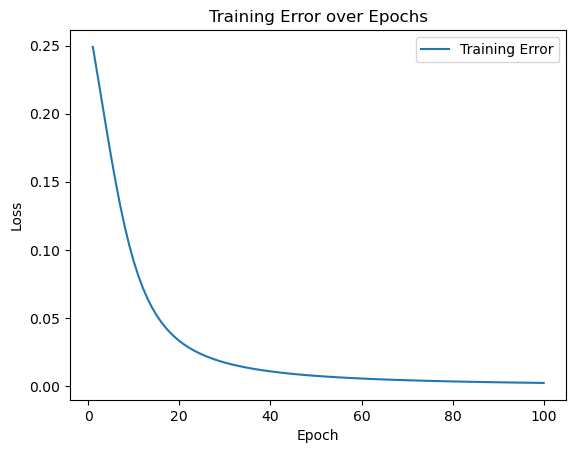

In [1]:
import numpy as np
from activations import *
from FCLayer import FCLayer, MSE
from FFNN import FFNN
import matplotlib.pyplot as plt


class Model(FFNN):
    def __init__(self):
        super().__init__()  # Corrected super() call
        bias_debug = 1
        l1 = FCLayer(2, 2, activation_function=sigmoid, bias=0.25 * bias_debug)
        out_layer = FCLayer(
            2, l1.layer_size, activation_function=sigmoid, bias=0.35 * bias_debug
        )

        # Editing weights manually
        l1.nodes[0].weights = np.array([0.1, 0.3])
        l1.nodes[1].weights = np.array([0.2, 0.4])
        out_layer.nodes[0].weights = np.array([0.5, 0.6])
        out_layer.nodes[1].weights = np.array([0.7, 0.8])

        self.layers = [l1, out_layer]  # Initialize layers as a list and append layers


# Training
np.random.seed(0)
model = Model()
input = np.array([0.1, 0.5])
target = np.array([0.05, 0.95])
epochs = 100

losses = []  # List to store loss values

for i in range(epochs):
    y = model.predict(input)

    loss = MSE(target, y)
    losses.append(loss)  # Append current loss to the list

    if (i + 1) % 10 == 0 or i == 0:
        print(f"Forward Pass {y}")
        print(f"Loss: {loss}")

    model.backpropagate(target=target)
    model.SGD_step(learning_rate=0.6)

plt.plot(range(1, epochs + 1), losses, label="Training Error")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Error over Epochs")
plt.legend()
plt.show()

Layer: input size = 1, layer size = 5
Layer: input size = 5, layer size = 5
Layer: input size = 5, layer size = 1


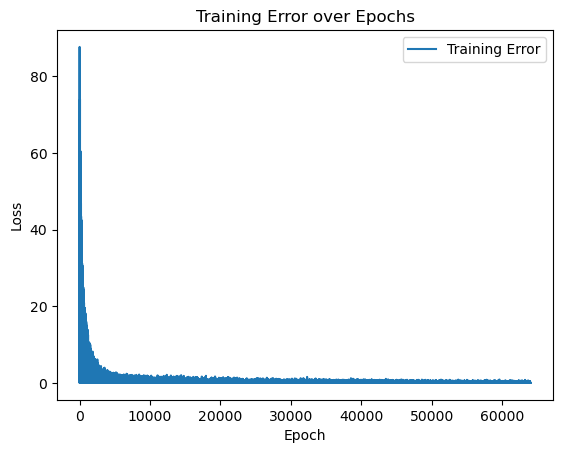

Final Loss 0.020807209130567567


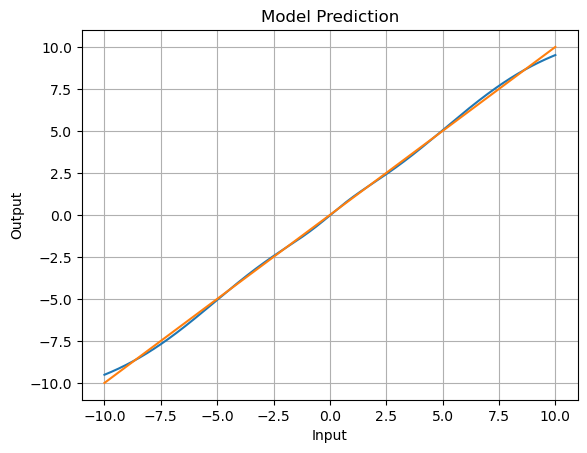

In [2]:
from sklearn.utils import shuffle
import numpy as np
from activations import *
from FCLayer import FCLayer, MSE
from FFNN import FFNN
import matplotlib.pyplot as plt

# Generate training data
N = 32 * 10
x = np.linspace(-10, 10, num=N)


def f(x):
    return x
    # return np.sin(x) * (x**2 + x**3) / 1000


eps = np.random.normal(0, 0.0, N)  # noise
y = f(x) + eps


class Model(FFNN):
    def __init__(self):
        super().__init__()
        l1 = FCLayer(5, 1, activation_function=tanh)
        l2 = FCLayer(5, 5, activation_function=tanh)
        out_layer = FCLayer(1, 5, activation_function=identity)
        self.layers = [l1, l2, out_layer]


# Training
model = Model()

losses = []

epochs = 200
for epoch in range(epochs):
    x_, y_ = shuffle(x, y)
    for i in range(N):
        prediction = model.predict(x_[i])
        target = y_[i]
        loss = MSE(target, prediction)
        losses.append(loss)

        model.backpropagate(target=target)
        model.SGD_step(learning_rate=0.001)

plt.plot(losses, label="Training Error")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Error over Epochs")
plt.legend()
plt.show()

# Predict the outputs for the inputs
outputs = [model.predict(x_i)[0] for x_i in x]
loss = MSE(y, outputs)
print(f"Final Loss {loss}")

# Plot the outputs
plt.plot(x, outputs)
plt.plot(x, y)

plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Model Prediction")
plt.grid(True)
plt.show()

Layer: input size = 1, layer size = 10
Layer: input size = 10, layer size = 1
Number of mini batches is  10
Final Loss 29.041929036018256


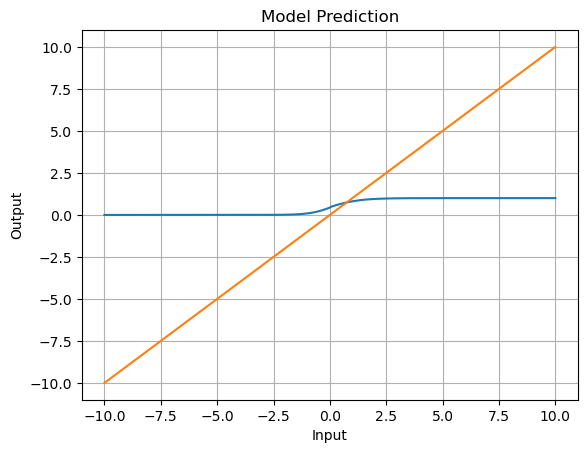

In [3]:
from sklearn.utils import shuffle
import numpy as np
from activations import *
from FCLayer import FCLayer, MSE
from FFNN import FFNN
import matplotlib.pyplot as plt

# Generate training data
N = 32 * 10
x = np.linspace(-10, 10, num=N)


def f(x):
    return x
    return 1 / (1 + np.exp(-x))

np.random.seed(0)

eps = np.random.normal(0, 0.0, N)  # noise
y = f(x) + eps

learning_rate = 0.005


class Model(FFNN):
    def __init__(self):
        super().__init__()
        l1 = FCLayer(10, 1, activation_function=LReLu)
        l2 = FCLayer(1, 10, activation_function=sigmoid)
        # out_layer = FCLayer(1, 10, activation_function=identity)
        self.layers = [l1, l2]


# Training
model = Model()
epochs = 100
batch_size = 32
num_batches = int(x.size / batch_size)
print("Number of mini batches is ", num_batches)

for epoch in range(epochs):
    x_, y_ = shuffle(x, y)
    # Create minibatches
    x_batches = np.array_split(x_, len(x) // batch_size)
    y_batches = np.array_split(y_, len(y) // batch_size)

    # For each batch
    model.zero_grad()
    for x_batch, y_batch in zip(x_batches, y_batches):
        avg_loss = 0
        # For each datapoint in each batch
        for x_i, y_i in zip(x_batch, y_batch):
            hat_yi = model.predict(x_i)
            avg_loss += MSE(y_i, hat_yi)
            model.backpropagate(target=y_i)

        avg_loss /= batch_size
        # print("Training loss:", avg_loss)

    model.SGD_step(learning_rate=learning_rate, batch_size=batch_size)


# Predict the outputs for the inputs
outputs_ = [model.predict(x_i)[0] for x_i in x]

# Plot the outputs_
plt.plot(x, outputs_)
plt.plot(x, y)

loss = MSE(y, outputs_)
print(f"Final Loss {loss}")

plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Model Prediction")
plt.grid(True)
plt.show()

Let's compare the results with pytorch

Epoch 1, Loss: 29.266462
Epoch 100, Loss: 29.010401


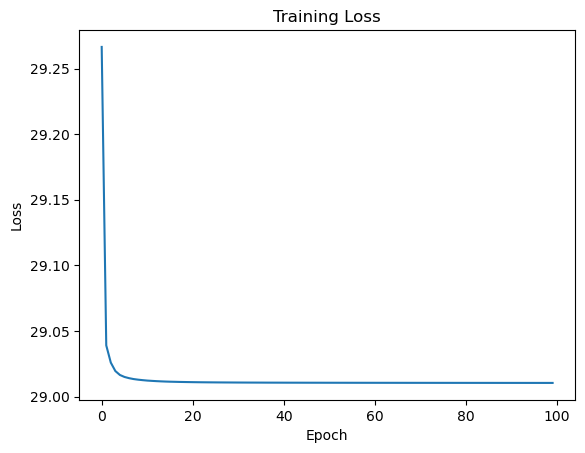

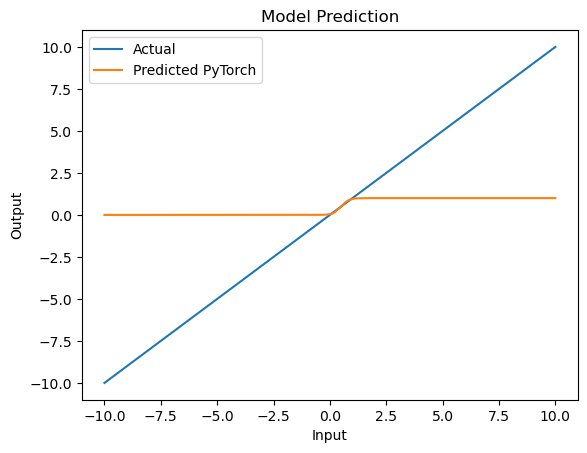

In [4]:
# Convert data to PyTorch tensors
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader


N = 32 * 10
x = np.linspace(-10, 10, num=N)

learning_rate = 0.5
def f(x):
    return x
    return np.sin(x) * (x**2 + x**3) / 1000


eps = np.random.normal(0, 0.0, N)  # noise
y = f(x) + eps

x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(
    1
)  # Add an extra dimension for single feature
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)


# Define the model
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(1, 5)
        self.fc2 = nn.Linear(5, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        # x = self.fc2(x)
        return x


# Create DataLoader for minibatch SGD
batch_size = 16
dataset = TensorDataset(x_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Initialize the model, loss function, and optimizer
model = Model()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
epochs = 100
losses = []
for epoch in range(epochs):
    epoch_loss = 0.0
    for inputs, targets in dataloader:
        optimizer.zero_grad()  # Zero the gradients

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        epoch_loss += loss.item()

        # Backward pass
        loss.backward()
        optimizer.step()

    # Calculate average epoch loss
    epoch_loss /= len(dataloader)
    losses.append(epoch_loss)

    # Print epoch loss
    if (epoch + 1) % 100 == 0 or epoch == 0:
        print(f"Epoch {epoch + 1}, Loss: {epoch_loss:.6f}")

# Plot the training loss
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

# Plot the predictions
with torch.no_grad():
    model.eval()
    plt.plot(x, y, label="Actual")
    plt.plot(x, model(x_tensor).numpy(), label="Predicted PyTorch")
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.title("Model Prediction")
    plt.legend()
    plt.show()